<a href="https://colab.research.google.com/github/rashida048/Advanced-Pandas-Application/blob/master/Custom_and_Distributed_Training/Custom_Loss_and_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
class Model(object):
  def __init__(self):
    self.w = tf.Variable(2.0)
    self.b = tf.Variable(1.0)

  def __call__(self, x):
    return self.w*x + self.b 
model= Model()

In [ ]:
def loss(predicted_y, target_y):
  return tf.reduce_mean(tf.square(predicted_y - target_y))

In [ ]:
TRUE_w = 3.0
TRUE_b = 2.0
NUM_EXAMPLES = 1000

xs  = tf.random.normal(shape=[NUM_EXAMPLES])

ys = (TRUE_w * xs) + TRUE_b

In [ ]:
def plot_data(inputs, outputs, predicted_outputs):
  real = plt.scatter(inputs, outputs, c='b', marker='.')
  predicted = plt.scatter(inputs, predicted_outputs, c='r', marker='+')
  plt.legend((real,predicted), ('Real Data', 'Predicted Data'))
  plt.show()

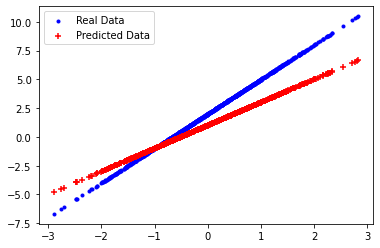

Current loss: 2.022649


In [ ]:
plot_data(xs, ys, model(xs))
print('Current loss: %1.6f' % loss(model(xs), ys).numpy())

In [ ]:
def train(model, inputs, outputs, learning_rate):
  with tf.GradientTape() as t:
    current_loss = loss(model(inputs), outputs)
  dw, db = t.gradient(current_loss, [model.w, model.b])
  model.w.assign_sub(learning_rate * dw)
  model.b.assign_sub(learning_rate * db)
  return current_loss

In [ ]:
model =  Model()
list_w, list_b = [], []
epochs= range(15)
losses = []
for epoch in epochs:
  list_w.append(model.w.numpy())
  list_b.append(model.b.numpy())
  current_loss = train(model, xs, ys, learning_rate=0.1)
  losses.append(current_loss)
  print('Epoch %2d: w=%1.2f b=%1.2f, loss=%2.5f' %
        (epoch, list_w[-1], list_b[-1], current_loss))

Epoch  0: w=2.00 b=1.00, loss=2.02265
Epoch  1: w=2.20 b=1.20, loss=1.28715
Epoch  2: w=2.36 b=1.37, loss=0.81911
Epoch  3: w=2.49 b=1.49, loss=0.52127
Epoch  4: w=2.59 b=1.60, loss=0.33173
Epoch  5: w=2.67 b=1.68, loss=0.21111
Epoch  6: w=2.74 b=1.74, loss=0.13435
Epoch  7: w=2.79 b=1.80, loss=0.08550
Epoch  8: w=2.83 b=1.84, loss=0.05442
Epoch  9: w=2.87 b=1.87, loss=0.03463
Epoch 10: w=2.89 b=1.90, loss=0.02204
Epoch 11: w=2.92 b=1.92, loss=0.01403
Epoch 12: w=2.93 b=1.93, loss=0.00893
Epoch 13: w=2.95 b=1.95, loss=0.00568
Epoch 14: w=2.96 b=1.96, loss=0.00362


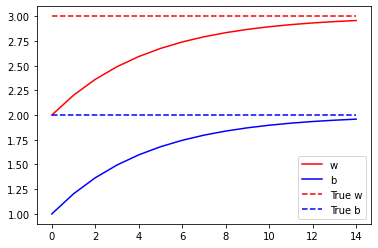

In [ ]:
plt.plot(epochs, list_w, 'r',
       epochs, list_b, 'b')
plt.plot([TRUE_w] * len(epochs), 'r--',
      [TRUE_b] * len(epochs), 'b--')
plt.legend(['w', 'b', 'True w', 'True b'])
plt.show()

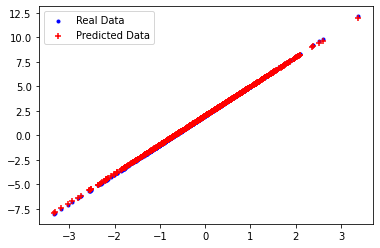

In [ ]:
test_inputs  = tf.random.normal(shape=[NUM_EXAMPLES])
test_outputs = test_inputs * TRUE_w + TRUE_b

predicted_test_outputs = model(test_inputs)
plot_data(test_inputs, test_outputs, predicted_test_outputs)

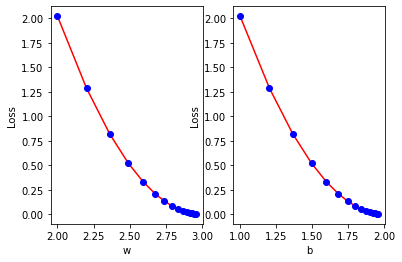

In [ ]:
def plot_loss_for_weights(weights_list, losses):
  for idx, weights in enumerate(weights_list):
    plt.subplot(120 + idx + 1)
    plt.plot(weights['values'], losses, 'r')
    plt.plot(weights['values'], losses, 'bo')
    plt.xlabel(weights['name'])
    plt.ylabel('Loss')
    
    
weights_list = [{ 'name' : "w",
                  'values' : list_w
                },
                {
                  'name' : "b",
                  'values' : list_b
                }]

plot_loss_for_weights(weights_list, losses)